In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [2]:
def show_pltImages(img,size,cvtcolor=False):
    if cvtcolor:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(size,size)) 
    plt.imshow(img,cmap='gray') 
    plt.show()

In [3]:
# file_path = 'C:/Users/sidsi/Desktop/0'
# file_list = os.listdir(file_path)
# file_list

In [4]:
def find_BBox(filename,img,width=1790,height=1790,save_file_path = 'b_box_images/'):
    imgCopy = img.copy()
    gray = cv2.cvtColor(imgCopy, cv2.COLOR_BGR2GRAY)

    ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) #OTSU 알고리즘 - 자동이진화
    show_pltImages(binary,15,True)
    blur_img = cv2.blur()
    c_contour, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    contours_cirles = []

    for con in c_contour:
        area = cv2.contourArea(con)
        areaRatio = area/(binary.shape[0]*binary.shape[1])
        #area와 circularity로 일정크기이상 원형태를 검출합니다. 검출안될시 ->> 조건문 숫자 수정.
        
        print("areaRatio",areaRatio)
        if 0.35 < areaRatio < 0.6:
            perimeter = cv2.arcLength(con, True)
            if perimeter == 0:
                continue
            circularity = 4*math.pi*(area/(perimeter*perimeter)) # 원형태의 정도 측정
#             print("circularity",circularity)
#             print("areaRatio",areaRatio)
            if 0.35 < circularity < 1.2:
                #전체이미지에서 원형이 차지하는 비율로 조건문추가
#                 print("circularity",circularity)
#                 print("areaRatio",areaRatio)
                contours_cirles.append(con) #조건이 만족하는 윤곽선만 추가합니다.

    x,y,w,h = cv2.boundingRect(contours_cirles[0])
    print("가로, 세로: ",w,h)
    print("평균:",(w+h)/2)
    print("1pixel당 mm : ", 21/((w+h)/2))
    x2 = x-int((width-w)/2)
    y2 = y-int((height-h)/2) #검은테두리를 잡는것이 아니라 안쪽을 잡아서 좌표를 재배치합니다.(더 정확함)
        
    mask = np.zeros(imgCopy.shape[:2],np.int8) #마스크제작(0,0,0)
    mask = cv2.drawContours(mask, contours_cirles, -1, (255), -1) #잡아낸 원형영역을 흰색으로
    show_pltImages(mask,15,False)
    img1_fg = cv2.bitwise_and(imgCopy, imgCopy, mask=mask) #완전검정색(0,0,0) 이 있는경우를 제외하고 통과시킴
    bboximg = img1_fg[y2:y2+height,x2:x2+width] # 1차 결과물 -> 검은 테두리기준안쪽으로 잘라내고 중앙(근사치)으로 정렬됨
    show_pltImages(bboximg,15,True)
    mask2 = np.zeros(bboximg.shape[:2],np.int8) #마스크제작2(0,0,0)
    cut_radius = round(bboximg.shape[0]*0.23) #잘라내고 남는 부분의 반지름 -> 렌즈가 잘리면 이 숫자를 수정
    cv2.circle(mask2,(round(mask2.shape[1]/2),round(mask2.shape[0]/2)),cut_radius,255,-1) # 마스크중앙에 반지름 450의 흰 원을 제작
    
    cut_background = round(-10+(bboximg.shape[0] - cut_radius*2)/2) #잘라낼 배경 , (추가여백:10px 줌)
    
    img2_fg = cv2.bitwise_and(bboximg, bboximg, mask=mask2) #완전검정색(0,0,0) 이 있는경우를 제외하고 통과시킴 = 흰 원부분만 남김
    bboximg2 = img2_fg[cut_background:-cut_background,cut_background:-cut_background] # 상하좌우 400픽셀씩 삭제함. -> 2차 결과물
    #결과물보여주기
#     plt.imshow(bboximg2,cmap='gray')
#     plt.show()
#     show_pltImages(bboximg2,15,True)
#     os.makedirs("./"+save_file_path, exist_ok=True) #저장할 디렉토리. 없으면 자동생성됨
#     cv2.imwrite(save_file_path+filename.split(sep=".")[-2]+"_bbox."+filename.split(sep=".")[-1],bboximg2) #파일명+_bbox.bmp
    
    return bboximg2

52
/home/cgac/ContactLensCC/model/img/dotmissing/20220122051523_11-0.bmp


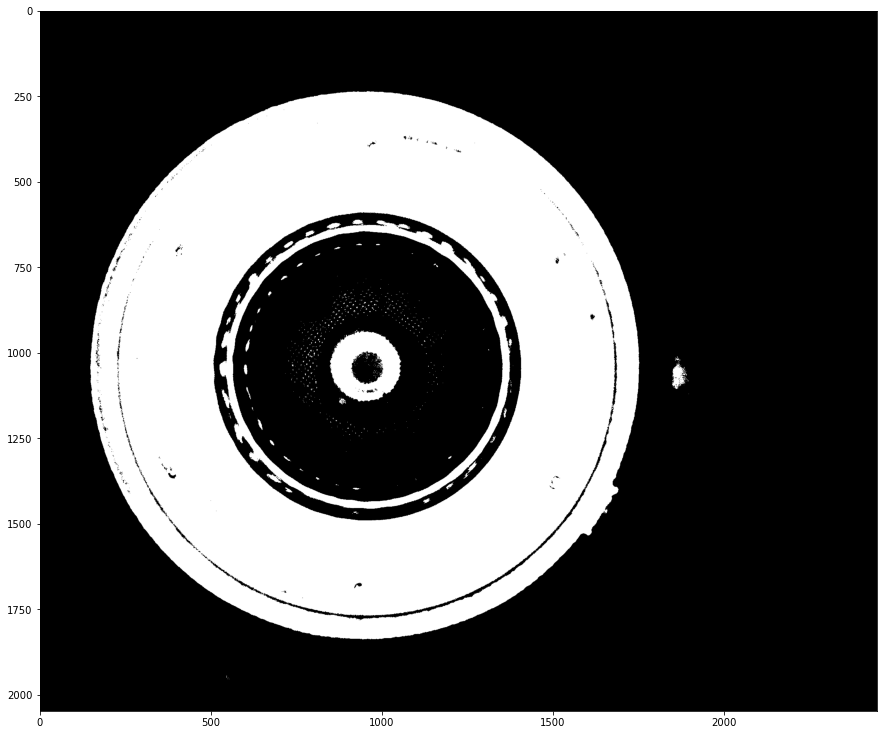

areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 1.9946129493464053e-07
areaRatio 9.973064746732026e-08
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 1.9946129493464053e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 1.9946129493464053e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 5.983838848039216e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0003372890497344771
areaRatio 3.9892258986928106e-07
areaRatio 7.978451797385621e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.490572661356209e-06
areaRatio 2.0943435968137257e-06
areaRatio 7.978451797385621e-07
areaRatio 7.978451797385621e-07
areaRatio 1.3962290645424836e-06
areaRatio 7.978451797385621e-07
areaRatio 1.3962290645424836e-06
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 1.495959712009804e-06
areaRatio 3.9892258986928106e-07
areaRatio 7.978451797385621e-07
areaRatio

areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 1.0970371221405228e-06
areaRatio 1.9946129493464053e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 5.983838848039216e-07
areaRatio 0.0
areaRatio 8.975758272058823e-07
areaRatio 0.0
areaRatio 5.983838848039216e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 1.5956903594771242e-06
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 2.991919424019608e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 9.973064746732027e-07
areaRatio 9.973064746732026e-08
areaRatio 4.986532373366013e-07
areaRatio 9.973064746732026e-08
areaRatio 0.0
areaRatio 1.9946129493464053e-07
areaRatio 3.9892258986928106e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 7.978451797385621e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 7.978451797385621e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 1.9946129493464053e-07
areaRatio 9.973064746732026e-08
areaRatio 9.9730

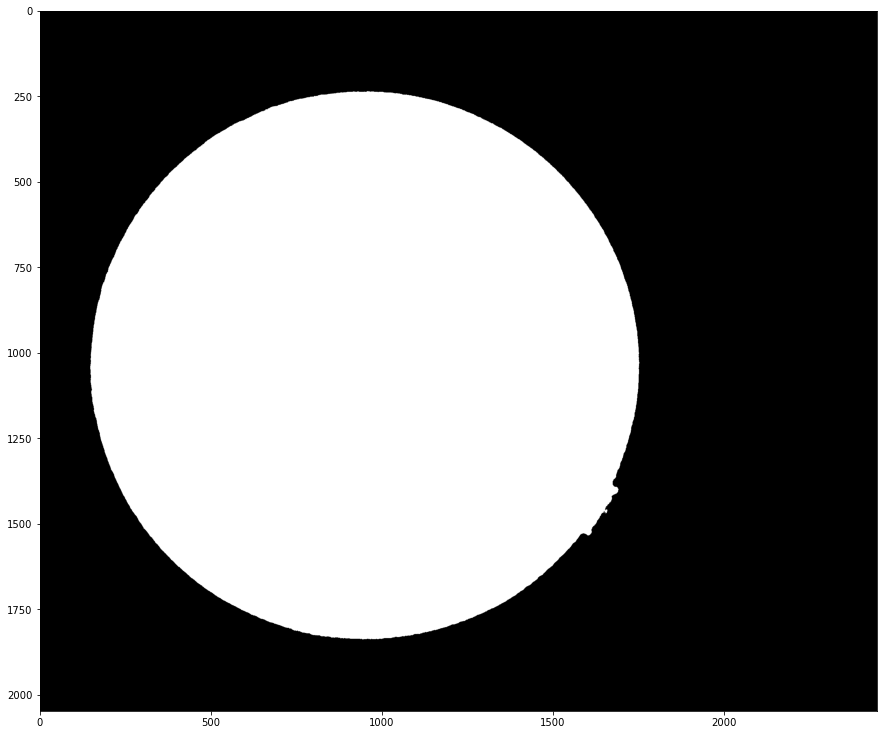

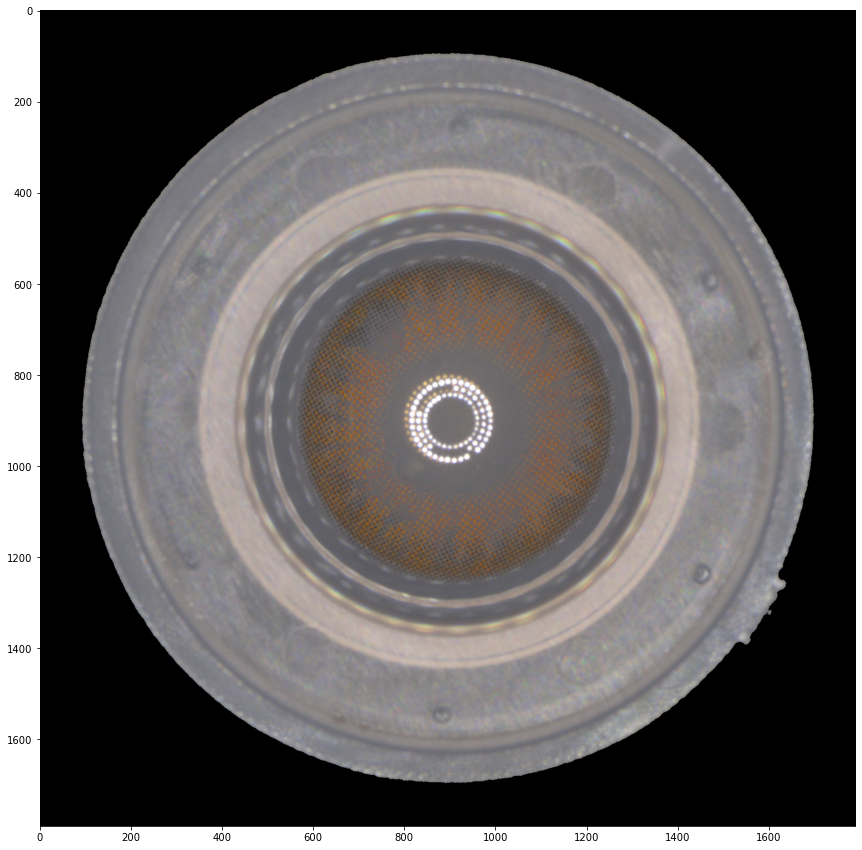

2.420828342437744
/home/cgac/ContactLensCC/model/img/dotmissing/20220122051506_9-0.bmp


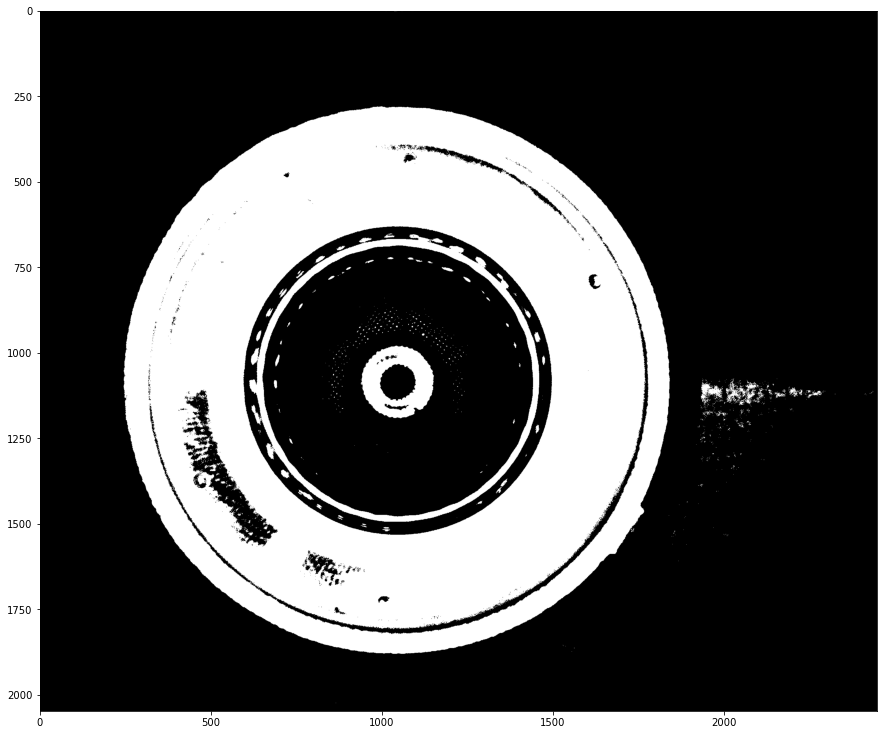

areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 1.9946129493464053e-07
areaRatio 0.0
areaRatio 2.991919424019608e-07
areaRatio 1.6954210069444444e-06
areaRatio 3.9892258986928106e-07
areaRatio 0.0
areaRatio 8.975758272058823e-07
areaRatio 3.9892258986928106e-07
areaRatio 7.978451797385621e-07
areaRatio 3.9892258986928106e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 9.973064746732026e-08
areaRatio 0.0
areaRatio 0.0
areaRatio 9.973064746732026e-08
areaRatio 0.0
areaRatio 0.0
areaRatio 9.973064746732026e-08
areaRatio 5.983838848039216e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 9.973064746732026e-08
areaRatio 0.0
areaRatio 0.0
areaRatio 6.9811453

areaRatio 0.005532059015012255
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 9.973064746732026e-08
areaRatio 6.482492085375817e-06
areaRatio 3.9892258986928106e-07
areaRatio 9.973064746732026e-08
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 1.2266869638480393e-05
areaRatio 7.978451797385621e-07
areaRatio 0.0
areaRatio 5.784377553104575e-06
areaRatio 3.9892258986928106e-07
areaRatio 1.9946129493464053e-07
areaRatio 0.0
areaRatio 4.088956546160131e-06
areaRatio 2.991919424019608e-07
areaRatio 9.973064746732026e-08
areaRatio 0.0
areaRatio 0.0
areaRatio 2.991919424019608e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 1.9946129493464053e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 1.9946129493464053e-07
areaRatio 0.0
areaRatio 9.973064746732026e-08
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 1.9946129493464053e-07
areaRatio 0.0
areaRatio 0.0
areaRatio 0.

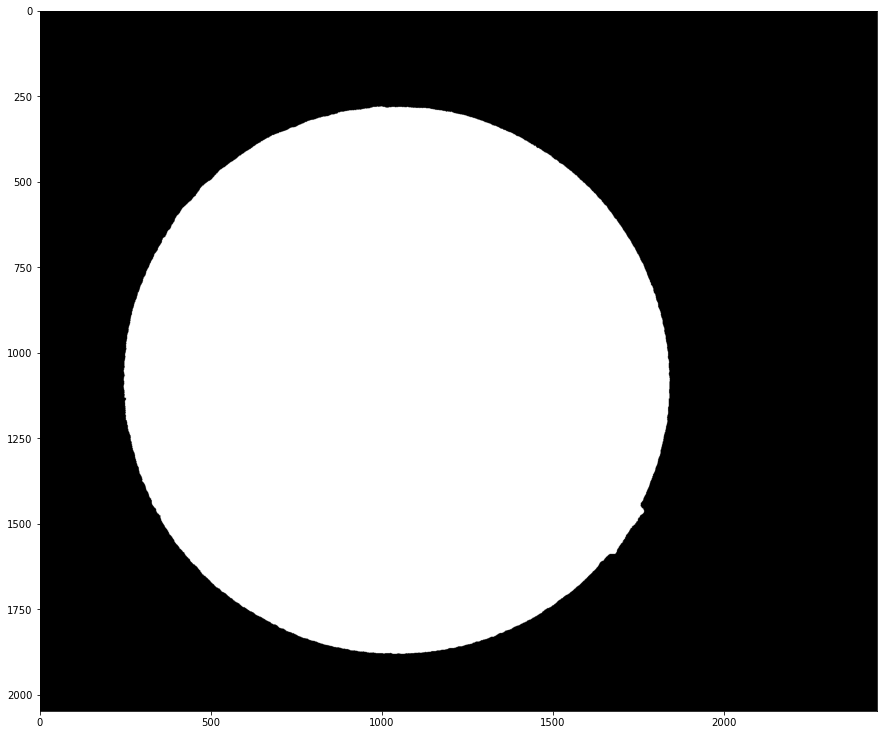

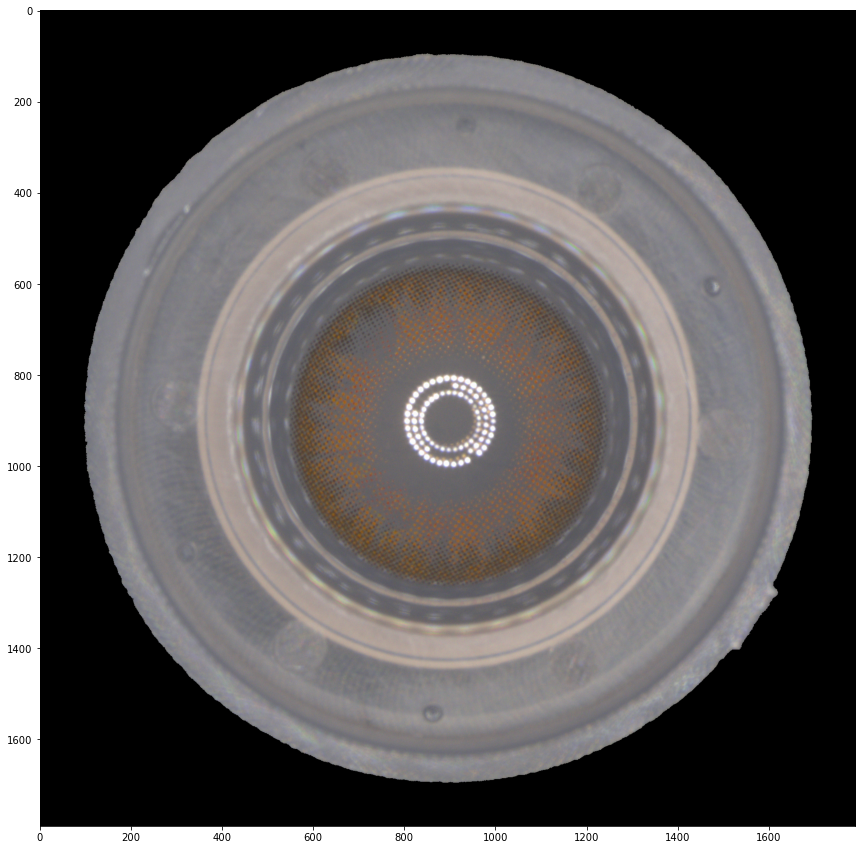

2.476201295852661
/home/cgac/ContactLensCC/model/img/dotmissing/20220122051746_11-0.bmp


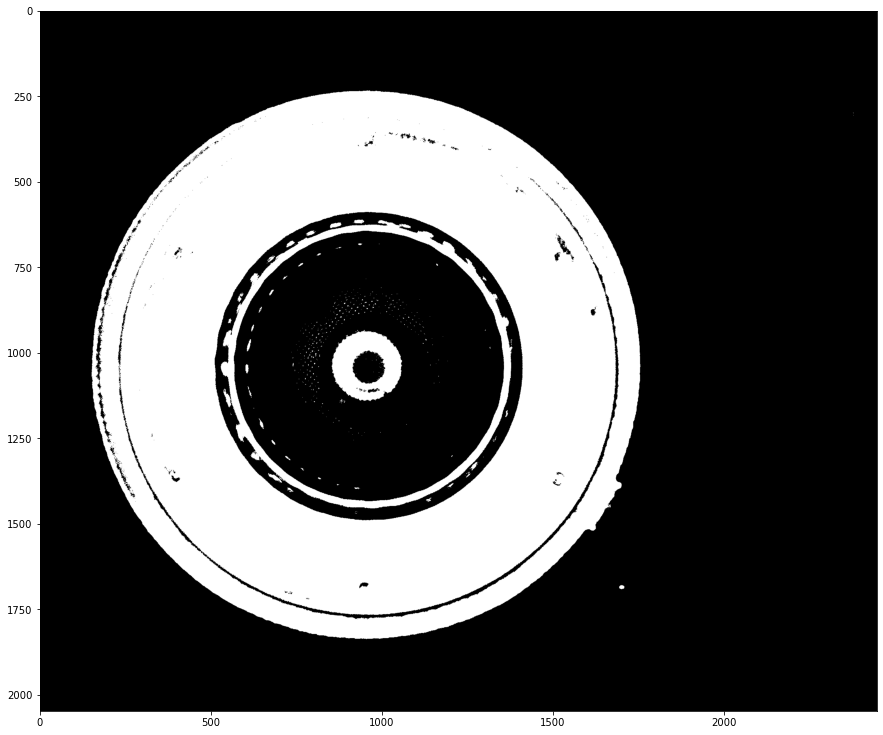

areaRatio 2.4035086039624182e-05
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.0
areaRatio 0.4020929274216197
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 2.3935355392156862e-06
areaRatio 2.3935355392156862e-06
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 1.9946129493464053e-06
areaRatio 5.185993668300654e-06
areaRatio 7.978451797385621e-07
areaRatio 6.083569495506536e-06
areaRatio 1.1967677696078431e-06
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 5.6148354524101304e-05
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.989225898692810

areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
areaRatio 3.9892258986928106e-07
가로, 세로:  1606 1603
평균: 1604.5
1pixel당 mm :  0.013088189467123715


KeyboardInterrupt: 

In [5]:
read_path = '/home/cgac/ContactLensCC/model/img/dotmissing'
save_path = '/home/cgac/ContactLensCC/model/category_img2/dotmissing'

imgs = os.listdir(read_path)
print(len(imgs))
for i in imgs:
    st = time.time()
    img = cv2.imread(f'{read_path}/{i}')
    print(f'{read_path}/{i}')
    img_bbox =find_BBox(i,img,save_file_path=None)
    cv2.imwrite(f'{save_path}/{i}.jpg', img_bbox)
    print(time.time()-st)

In [ ]:
for f in file_list:
    img =  cv2.imread(file_path+"/"+f)
    print("filename : ",f)
    img_bbox =find_BBox(f,img,save_file_path='b_box_images2/ok/')
    plt.subplot(1,2,1)
    plt.imshow(img,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(img_bbox,cmap='gray')
    plt.show()
    print("======================================================")